---

# Georgios_Ioannou


## Copyright © 2023 by Georgios Ioannou


---

<h1 align="center"> Text Emotion System Sentiment Analysis </h1>
<h2 align="center"> TESSA </h2>

In this notebook, we will be classifying emotion based on text documents. The dataset we will be using is called:

<p style="text-align: center;"><a href="https://www.kaggle.com/datasets/praveengovi/emotions-dataset-for-nlp">Emotions Dataset for NLP</a></p>


---

<h2 align="center"> Remember our main steps motto "ISBE" </h2>

<h3 align="center"> Main Steps when building a Machine Learning Model </h3>

1. **I** - `Inspect and explore data`
2. **S** - `Select and engineer features`
3. **B** - `Build and train model`
4. **E** - `Evaluate model`


---

<h2 align='center'> GPU Information </h2>


In [1]:
!nvidia-smi


Wed Dec 20 08:15:28 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.161.03   Driver Version: 470.161.03   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

---

<h2 align='center'> Libraries </h2>


In [2]:
# Import libraries.

# Use inline so our visualizations display in notebook.


%matplotlib inline


import matplotlib.pyplot as plt   # Data visualization.
import nltk                       # Natural Language Processing.
import numpy as np                # Data wrangling.
import os                         # Manipulate operating system interfaces.
import pandas as pd               # Data handling.
pd.set_option('display.max_colwidth', None)
import pickle                     # Python object serialization.
import plotly.express as px       # Data visualization
import plotly.graph_objects as go # Data visualization
import re                         # Regular expression operations.
import seaborn as sns             # Data visualization.
import subprocess                 # To download nltk wordnet in Kaggle.
sns.set()
import warnings                   # Ignore all warnings.
warnings.filterwarnings('ignore')


from nltk.stem import WordNetLemmatizer # Lemmatize using WordNet's built-in morphy function.
from nltk.stem import PorterStemmer     # Remove morphological affixes from words, leaving only the word stem.
from nltk.corpus import stopwords       # Remove stopwaords.
from nltk import word_tokenize          # Tokenize.
from sklearn.feature_extraction.text import CountVectorizer # Convert a collection of text documents to a matrix of token counts.
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, multilabel_confusion_matrix, precision_score, recall_score # Evaluation metrics.
from sklearn.model_selection import train_test_split     # Eplit data in training/validating/testing.
from sklearn.naive_bayes import MultinomialNB            # Multinomial Naive Bayes classifier.
from sklearn.preprocessing import LabelEncoder           # Encode target labels with value between 0 and n_classes-1.
from tensorflow.keras.callbacks import EarlyStopping     # Stop training when a monitored metric has stopped improving.
from tensorflow.keras.callbacks import ReduceLROnPlateau # Reduce learning rate when a metric has stopped improving.
from tensorflow.keras.layers import Activation, BatchNormalization, Bidirectional, Concatenate, Conv1D, Dense, Dropout, Embedding, GlobalMaxPooling1D, LSTM, MaxPooling1D, ReLU # Keras layers API.
from tensorflow.keras.models import Model, Sequential # Model achitecture.
from tensorflow.keras.optimizers import Adam         # Adam optimizer.
from tensorflow.keras.preprocessing.sequence import pad_sequences # Transformsa list of sequences into a 2D Numpy array.
from tensorflow.keras.preprocessing.text import Tokenizer         # Vectorize a text corpus.
from tensorflow.keras.utils import plot_model                     # Visualize the model and save it.
from tensorflow.keras.utils import to_categorical                 # Converts a class vector (integers) to binary class matrix.


try:
    nltk.data.find('wordnet.zip')
except:
    nltk.download('wordnet', download_dir='/kaggle/working/')
    command = 'unzip /kaggle/working/corpora/wordnet.zip -d /kaggle/working/corpora'
    subprocess.run(command.split())
    nltk.data.path.append('/kaggle/working/')
    

from nltk.corpus import wordnet

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[nltk_data] Downloading package wordnet to /kaggle/working/...
Archive:  /kaggle/working/corpora/wordnet.zip
   creating: /kaggle/working/corpora/wordnet/
  inflating: /kaggle/working/corpora/wordnet/lexnames  
  inflating: /kaggle/working/corpora/wordnet/data.verb  
  inflating: /kaggle/working/corpora/wordnet/index.adv  
  inflating: /kaggle/working/corpora/wordnet/adv.exc  
  inflating: /kaggle/working/corpora/wordnet/index.verb  
  inflating: /kaggle/working/corpora/wordnet/cntlist.rev  
  inflating: /kaggle/working/corpora/wordnet/data.adj  
  inflating: /kaggle/working/corpora/wordnet/index.adj  
  inflating: /kaggle/working/corpora/wordnet/LICENSE  
  inflating: /kaggle/working/corpora/wordnet/citation.bib  
  inflating: /kaggle/working/corpora/wordnet/noun.exc  
  inflating: /kaggle/working/corpora/wordnet/verb.exc  
  inflating: /kaggle/working/corpora/wordnet/README  
  inflating: /kaggle/working/corpora/wordnet/index.sense  
  inflating: /kaggle/working/corpora/wordnet/data.

True

---

## #1 Inspect And Explore Data


## 1.1 List All Files Under The Input Directory To See The Number Of Files


In [3]:
files_list = []
files_count = 0

for dirname, _, filenames in os.walk("/kaggle/input"):
    for filename in filenames:
        files_list.append(os.path.join(dirname, filename))
        files_count += 1

print("\nLength of files_list =", len(files_list), end="\n\n")
print("files_list[0] =", files_list[0])
print("files_list[1] =", files_list[1])
print("files_list[2] =", files_list[2])


Length of files_list = 3

files_list[0] = /kaggle/input/emotions-dataset-for-nlp/val.txt
files_list[1] = /kaggle/input/emotions-dataset-for-nlp/test.txt
files_list[2] = /kaggle/input/emotions-dataset-for-nlp/train.txt


## 1.2 Import Dataset Paths


In [4]:
EMOTIONS_DATASET_FOR_NLP_TRAIN_PATH = "../input/emotions-dataset-for-nlp/train.txt"
EMOTIONS_DATASET_FOR_NLP_VAL_PATH = "../input/emotions-dataset-for-nlp/val.txt"
EMOTIONS_DATASET_FOR_NLP_TEST_PATH = "../input/emotions-dataset-for-nlp/test.txt"

## 1.3 Explore the Data of the [`Emotions Dataset for NLP`](https://www.kaggle.com/datasets/praveengovi/emotions-dataset-for-nlp)


### 1.3.1 Read the Text Files


In [5]:
# Open the train.txt file in read mode.

with open(EMOTIONS_DATASET_FOR_NLP_TRAIN_PATH, "r") as train_file:
    head = [next(train_file) for i in range(1)]

# Print the first line of the train.txt file.

print(head, "\n")


# Open the train.txt file in read mode.

with open(EMOTIONS_DATASET_FOR_NLP_TRAIN_PATH, "r") as train_file:
    head = [next(train_file) for i in range(5)]

# Print the first five lines of the train.txt file.

print(head)

['i didnt feel humiliated;sadness\n'] 

['i didnt feel humiliated;sadness\n', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake;sadness\n', 'im grabbing a minute to post i feel greedy wrong;anger\n', 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property;love\n', 'i am feeling grouchy;anger\n']


In [6]:
# Open the val.txt file in read mode.

with open(EMOTIONS_DATASET_FOR_NLP_VAL_PATH, "r") as train_file:
    head = [next(train_file) for i in range(1)]

# Print the first line of the val.txt file.

print(head, "\n")


# Open the val.txt file in read mode.

with open(EMOTIONS_DATASET_FOR_NLP_VAL_PATH, "r") as train_file:
    head = [next(train_file) for i in range(5)]

# Print the first five lines of the val.txt file.

print(head)

['im feeling quite sad and sorry for myself but ill snap out of it soon;sadness\n'] 

['im feeling quite sad and sorry for myself but ill snap out of it soon;sadness\n', 'i feel like i am still looking at a blank canvas blank pieces of paper;sadness\n', 'i feel like a faithful servant;love\n', 'i am just feeling cranky and blue;anger\n', 'i can have for a treat or if i am feeling festive;joy\n']


In [7]:
# Open the test.txt file in read mode.

with open(EMOTIONS_DATASET_FOR_NLP_TEST_PATH, "r") as train_file:
    head = [next(train_file) for i in range(1)]

# Print the first line of the test.txt file.

print(head, "\n")


# Open the test.txt file in read mode.

with open(EMOTIONS_DATASET_FOR_NLP_TEST_PATH, "r") as train_file:
    head = [next(train_file) for i in range(5)]

# Print the first five lines of the test.txt file.

print(head)

['im feeling rather rotten so im not very ambitious right now;sadness\n'] 

['im feeling rather rotten so im not very ambitious right now;sadness\n', 'im updating my blog because i feel shitty;sadness\n', 'i never make her separate from me because i don t ever want her to feel like i m ashamed with her;sadness\n', 'i left with my bouquet of red and yellow tulips under my arm feeling slightly more optimistic than when i arrived;joy\n', 'i was feeling a little vain when i did this one;sadness\n']


### 1.3.2 Convert Text Files To Pandas Dataframes For Data Handling, Data Wrangling, and Explanatory Data Analysis


In [8]:
# Train Pandas Dataframe.

train_df = pd.read_csv(
    filepath_or_buffer=EMOTIONS_DATASET_FOR_NLP_TRAIN_PATH,
    sep=";",
    names=["document", "emotion"],
)

# Validation Pandas Dataframe.

val_df = pd.read_csv(
    filepath_or_buffer=EMOTIONS_DATASET_FOR_NLP_VAL_PATH,
    sep=";",
    names=["document", "emotion"],
)

# Test Pandas Dataframe.

test_df = pd.read_csv(
    filepath_or_buffer=EMOTIONS_DATASET_FOR_NLP_TEST_PATH,
    sep=";",
    names=["document", "emotion"],
)

### 1.3.3 Explore The Data Of Train, Validation, and Test


Sanity Check
------------
train_df.shape = (16000, 2) 

****************************************************************************************************
Null Values Per Column
----------------------
train_df.isnull().sum() =
document    0
emotion     0
dtype: int64 

Null Values In The Whole Train Pandas Dataframe
----------------------------------------------
train_df.isnull().sum().sum() =  0 

****************************************************************************************************
Duplicate Rows
--------------
duplicates.sum() = 1
Duplicate Rows   =                                                             document emotion
13846  i feel more adventurous willing to take risks img src http cdn     joy

train_df.shape = (15999, 2) 

****************************************************************************************************
Duplicate Documents
-------------------
len(train_df[duplicates]) = 30
                                                                   

,document,emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplace i will know that it is still on the property,love
4,i am feeling grouchy,anger
...,...,...
15995,i just had a very brief time in the beanbag and i said to anna that i feel like i have been beaten up,sadness
15996,i am now turning and i feel pathetic that i am still waiting tables and subbing with a teaching degree,sadness
15997,i feel strong and good overall,joy
15998,i feel like this was such a rude comment and im glad that t,anger


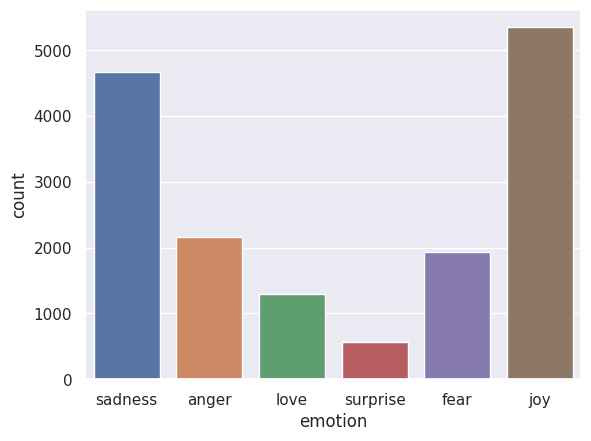

In [9]:
# Train Pandas Dataframe.

# Sanity check.

print("Sanity Check")
print("------------")

print("train_df.shape =", train_df.shape, "\n")

print("*" * 100)

# Check for null values per column.

print("Null Values Per Column")
print("----------------------")

print("train_df.isnull().sum() =")
print(train_df.isnull().sum(), "\n")

# Check for null values in the whole train Pandas dataframe.

print("Null Values In The Whole Train Pandas Dataframe")
print("----------------------------------------------")

print("train_df.isnull().sum().sum() = ", train_df.isnull().sum().sum(), "\n")

print("*" * 100)

# Check for duplicate rows in the train Pandas dataframe.

print("Duplicate Rows")
print("--------------")

duplicates = train_df.duplicated()
print("duplicates.sum() =", duplicates.sum())
print("Duplicate Rows   =", end="")
print(train_df[duplicates])

# Drop duplicate rows.

train_df = train_df.drop_duplicates()

# Sanity check.

print("\ntrain_df.shape =", train_df.shape, "\n")

print("*" * 100)

# Check for duplicate documents in the train Pandas dataframe.
# (i.e. Documents that have more than one emotion attached to them.)
# Each document must have one and only one emotion.
# Keep only th first occurence of such a document.

print("Duplicate Documents")
print("-------------------")

# Check for duplicate entries in the 'document' column of the
# train Pandas dataframe and returns a boolean Series.
# The boolean Series is stored in the 'duplicates' variable.

duplicates = train_df.duplicated(subset="document")

# Print the length of the 'duplicates' boolean Series,
# which represents the number of duplicate 'document' entries.

print("len(train_df[duplicates]) =", len(train_df[duplicates]))

# Print the rows of the train Pandas dataframe where the 'document' entry is a duplicate.

print(train_df[duplicates])

# Remove the duplicate entries from the train Pandas dataframe.
# The 'subset' parameter is used to specify the column to check for duplicates.

train_df = train_df.drop_duplicates(subset="document")

# Sanity check.

print("\ntrain_df.shape =", train_df.shape, "\n")

print("*" * 100)

# Display the six unique emotions sorted in ascending order.

print("Classes and Value Counts")
print("------------------------")

print("Unique emotions =", sorted(train_df["emotion"].unique()), "\n")
print("# of Unique emotions =", len(train_df["emotion"].unique()), "\n")

# Display the value count for each emotion.

print(train_df.emotion.value_counts(), "\n")

print("*" * 100)

# This is the indexing that will be used for Label Encoding at a later stage.

print("Label Encoding")
print("--------------")

print("0=anger, 1=fear, 2=joy, 3=love, 4=sadness, 5=surprise\n")

print("*" * 100)

# Create a count plot for the train Pandas dataframe.

sns.countplot(data=train_df, x="emotion")

train_df

Sanity Check
------------
val_df.shape = (2000, 2) 

****************************************************************************************************
Null Values Per Column
----------------------
val_df.isnull().sum() =
document    0
emotion     0
dtype: int64 

Null Values In The Whole Validation Pandas Dataframe
----------------------------------------------------
val_df.isnull().sum().sum() =  0 

****************************************************************************************************
Duplicate Rows
--------------
duplicates.sum() = 0
Duplicate Rows   =Empty DataFrame
Columns: [document, emotion]
Index: []

val_df_df.shape = (2000, 2) 

****************************************************************************************************
Duplicate Documents
-------------------
len(val_df[duplicates]) = 2
                                                                                                                                           document  \
603   i have had

,document,emotion
0,im feeling quite sad and sorry for myself but ill snap out of it soon,sadness
1,i feel like i am still looking at a blank canvas blank pieces of paper,sadness
2,i feel like a faithful servant,love
3,i am just feeling cranky and blue,anger
4,i can have for a treat or if i am feeling festive,joy
...,...,...
1995,im having ssa examination tomorrow in the morning im quite well prepared for the coming exam and somehow i feel numb towards exam because in life there is much more important things than exam,sadness
1996,i constantly worry about their fight against nature as they push the limits of their inner bodies for the determination of their outer existence but i somehow feel reassured,joy
1997,i feel its important to share this info for those that experience the same thing,joy
1998,i truly feel that if you are passionate enough about something and stay true to yourself you will succeed,joy


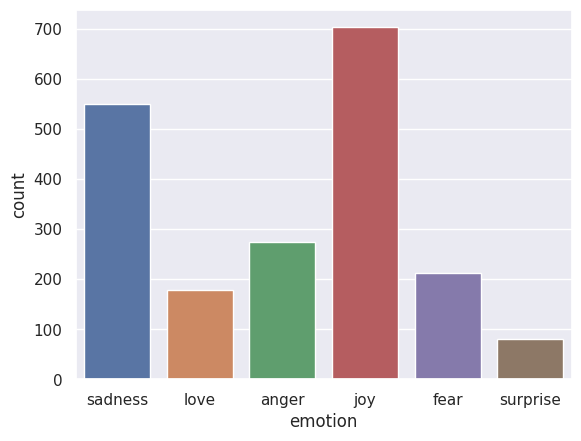

In [10]:
# Validation Pandas Dataframe.

# Sanity check.

print("Sanity Check")
print("------------")

print("val_df.shape =", val_df.shape, "\n")

print("*" * 100)

# Check for null values per column.

print("Null Values Per Column")
print("----------------------")

print("val_df.isnull().sum() =")
print(val_df.isnull().sum(), "\n")

# Check for null values in the whole validation Pandas dataframe.

print("Null Values In The Whole Validation Pandas Dataframe")
print("----------------------------------------------------")

print("val_df.isnull().sum().sum() = ", val_df.isnull().sum().sum(), "\n")

print("*" * 100)

# Check for duplicate rows in the train Pandas dataframe.

print("Duplicate Rows")
print("--------------")

duplicates = val_df.duplicated()
print("duplicates.sum() =", duplicates.sum())
print("Duplicate Rows   =", end="")
print(val_df[duplicates])

# Drop duplicate rows.

val_df = val_df.drop_duplicates()

# Sanity check.

print("\nval_df_df.shape =", val_df.shape, "\n")

print("*" * 100)

# Check for duplicate documents in the validation Pandas dataframe.
# (i.e. Documents that have more than one emotion attached to them.)
# Each document must have one and only one emotion.

# Check for duplicate entries in the 'document' column of the
# validation Pandas dataframe and returns a boolean Series.
# The boolean Series is stored in the 'duplicates' variable.
# Keep only th first occurence of such a document.

print("Duplicate Documents")
print("-------------------")

duplicates = val_df.duplicated(subset="document")

# Print the length of the 'duplicates' boolean Series,
# which represents the number of duplicate 'document' entries.

print("len(val_df[duplicates]) =", len(val_df[duplicates]))

# Print the rows of the validation Pandas dataframe where the 'document' entry is a duplicate.

print(val_df[duplicates])

# Remove the duplicate entries from the validation Pandas dataframe.
# The 'subset' parameter is used to specify the column to check for duplicates.

val_df = val_df.drop_duplicates(subset="document")

# Sanity check.

print("\nval_df.shape =", val_df.shape, "\n")

print("*" * 100)

# Display the six unique emotions sorted in ascending order.

print("Classes and Value Counts")
print("------------------------")

print("Unique emotions =", sorted(val_df["emotion"].unique()), "\n")
print("# of Unique emotions =", len(val_df["emotion"].unique()), "\n")

# Display the value count for each emotion.

print(val_df.emotion.value_counts(), "\n")

print("*" * 100)

# This is the indexing that will be used for Label Encoding at a later stage.

print("Label Encoding")
print("--------------")

print("0=anger, 1=fear, 2=joy, 3=love, 4=sadness, 5=surprise\n")

print("*" * 100)

# Create a count plot for the validation Pandas dataframe.

sns.countplot(data=val_df, x="emotion")

val_df

Sanity Check
------------
test_df.shape = (2000, 2) 

****************************************************************************************************
Null Values Per Column
----------------------
test_df.isnull().sum() =
document    0
emotion     0
dtype: int64 

Null Values In The Whole Test Pandas Dataframe
----------------------------------------------
test_df.isnull().sum().sum() =  0 

****************************************************************************************************
Duplicate Rows
--------------
duplicates.sum() = 0
Duplicate Rows   =Empty DataFrame
Columns: [document, emotion]
Index: []

test_df.shape = (2000, 2) 

****************************************************************************************************
Duplicate Documents
-------------------
len(test_df[duplicates]) = 0
Empty DataFrame
Columns: [document, emotion]
Index: []

test_df.shape = (2000, 2) 

*********************************************************************************************

,document,emotion
0,im feeling rather rotten so im not very ambitious right now,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i don t ever want her to feel like i m ashamed with her,sadness
3,i left with my bouquet of red and yellow tulips under my arm feeling slightly more optimistic than when i arrived,joy
4,i was feeling a little vain when i did this one,sadness
...,...,...
1995,i just keep feeling like someone is being unkind to me and doing me wrong and then all i can think of doing is to get back at them and the people they are close to,anger
1996,im feeling a little cranky negative after this doctors appointment,anger
1997,i feel that i am useful to my people and that gives me a great feeling of achievement,joy
1998,im feeling more comfortable with derby i feel as though i can start to step out my shell,joy


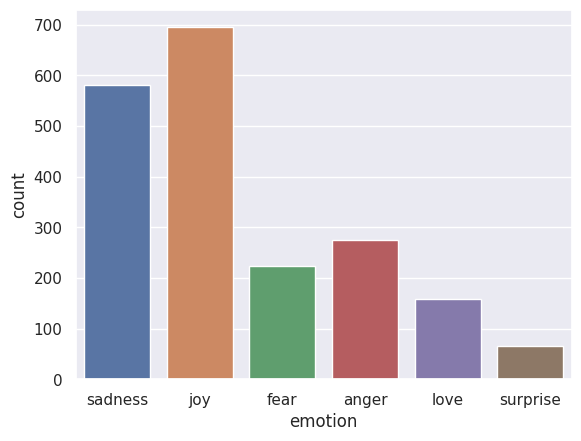

In [11]:
# Test Pandas Dataframe.

# Sanity check.

print("Sanity Check")
print("------------")

print("test_df.shape =", test_df.shape, "\n")

print("*" * 100)

# Check for null values per column.

print("Null Values Per Column")
print("----------------------")

print("test_df.isnull().sum() =")
print(test_df.isnull().sum(), "\n")

# Check for null values in the whole test Pandas dataframe.

print("Null Values In The Whole Test Pandas Dataframe")
print("----------------------------------------------")

print("test_df.isnull().sum().sum() = ", test_df.isnull().sum().sum(), "\n")

print("*" * 100)

# Check for duplicate rows in the test Pandas dataframe.

print("Duplicate Rows")
print("--------------")

duplicates = test_df.duplicated()
print("duplicates.sum() =", duplicates.sum())
print("Duplicate Rows   =", end="")
print(test_df[duplicates])

# Drop duplicate rows.

test_df = test_df.drop_duplicates()

# Sanity check.

print("\ntest_df.shape =", test_df.shape, "\n")

print("*" * 100)

# Check for duplicate documents in the test Pandas dataframe.
# (i.e. Documents that have more than one emotion attached to them.)
# Each document must have one and only one emotion.
# Keep only th first occurence of such a document.

# Check for duplicate entries in the 'document' column of the
# test Pandas dataframe and returns a boolean Series.
# The boolean Series is stored in the 'duplicates' variable.

print("Duplicate Documents")
print("-------------------")

duplicates = test_df.duplicated(subset="document")

# Print the length of the 'duplicates' boolean Series,
# which represents the number of duplicate 'document' entries.

print("len(test_df[duplicates]) =", len(test_df[duplicates]))

# Print the rows of the test Pandas dataframe where the 'document' entry is a duplicate.

print(test_df[duplicates])

# Remove the duplicate entries from the test Pandas dataframe.
# The 'subset' parameter is used to specify the column to check for duplicates.

test_df = test_df.drop_duplicates(subset="document")

# Sanity check.

print("\ntest_df.shape =", test_df.shape, "\n")

print("*" * 100)

# Display the six unique emotions sorted in ascending order.

print("Classes and Value Counts")
print("------------------------")

print("Unique emotions =", sorted(test_df["emotion"].unique()), "\n")
print("# of Unique emotions =", len(test_df["emotion"].unique()), "\n")

# Display the value count for each emotion.

print(test_df.emotion.value_counts(), "\n")

print("*" * 100)

# This is the indexing that will be used for Label Encoding at a later stage.

print("Label Encoding")
print("--------------")

print("0=anger, 1=fear, 2=joy, 3=love, 4=sadness, 5=surprise\n")

print("*" * 100)

# Create a count plot for the test Pandas dataframe.

sns.countplot(data=test_df, x="emotion")

test_df